In [3]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# 크롬 드라이버 설정
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 크롤링할 기본 URL (카테고리 1 예시)
base_url = "https://jumpit.saramin.co.kr/positions?jobCategory={}&sort=rsp_rate"
categories = {
    1: "서버/백엔드 개발자",
    2: "프론트엔드 개발자",
    3: "웹 풀스택 개발자",
    4: "안드로이드 개발자",
    5: "게임 클라이언트 개발자",
    6: "게임 서버 개발자",
    7: "DBA",
    8: "인공지능/머신러닝",
    9: "DevOps/시스템 엔지니어",
    10: "정보보안 담당자",
    11: "QA 엔지니어",
    12: "개발 PM",
    13: "HW/임베디드",
    15: "SW/솔루션",
    16: "IOS 개발자",
    17: "웹퍼블리셔",
    18: "크로스플랫폼 앱개발자",
    19: "빅데이터 엔지니어",
    20: "VR/AR/3D",
    22: "블록체인",
    21: "기술지원"
}

# 크롤링 함수
def crawl_jobs(category_id, category_name):
    url = base_url.format(category_id)
    driver.get(url)
    time.sleep(3)  # 페이지가 로드될 때까지 대기

    jobs = []

    # 동적 페이지에서 모든 공고가 로드될 때까지 기다리기
    last_height = driver.execute_script("return document.body.scrollHeight")  # 페이지의 현재 높이

    while True:
        # 페이지 끝까지 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)  # 페이지 로딩을 기다립니다.

        # 새로운 높이 계산
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        # 페이지 끝에 도달했으면 종료
        if new_height == last_height:
            print("End of page reached.")
            break
        last_height = new_height  # 새로 측정된 높이를 갱신

    # 채용 공고들을 추출
    job_list = driver.find_elements(By.CLASS_NAME, "sc-d609d44f-0.grDLmW")  # 공고 리스트를 포함하는 div 태그

    for job in job_list:
        # 공고 제목
        title = job.find_element(By.CLASS_NAME, "position_card_info_title").text.strip()
        
        # 회사명
        company = job.find_element(By.CLASS_NAME, "sc-15ba67b8-2.ixzmqw").text.strip()
        
        # 기술 스택 (sc-15ba67b8-1 iFMgIl 안의 모든 li 태그)
        tech_stack_elements = job.find_elements(By.CSS_SELECTOR, "ul.sc-15ba67b8-1.iFMgIl li")
        tech_stack = [tech.text.strip() for tech in tech_stack_elements]

        # 위치와 경력 정보 (sc-15ba67b8-1 cdeuol 안의 li 태그)
        location_experience = job.find_elements(By.CSS_SELECTOR, "ul.sc-15ba67b8-1.cdeuol li")
        
        # 위치와 경력 정보가 함께 있다면 처리
        if len(location_experience) == 2:
            location = location_experience[0].text.strip()  # 첫 번째 항목은 위치
            experience = location_experience[1].text.strip()  # 두 번째 항목은 경력
        else:
            location = "정보 없음"
            experience = "정보 없음"

        # 직무 정보는 카테고리 이름을 사용
        job_info = {
            'Title': title,
            'Company': company,
            'Job Category': category_name,
            'Tech Stack': ", ".join(tech_stack),
            'Location': location,
            'Experience': experience
        }
        jobs.append(job_info)

    return jobs

# 모든 카테고리에서 채용 공고 크롤링
all_jobs = []
for category_id, category_name in categories.items():
    print(f"Crawling category: {category_name}")
    jobs = crawl_jobs(category_id, category_name)
    all_jobs.extend(jobs)

# DataFrame으로 변환하여 엑셀 파일로 저장
df = pd.DataFrame(all_jobs)
df.to_excel('job_list_selenium.xlsx', index=False)

print("Crawling finished and saved to job_list_selenium.xlsx")

# 드라이버 종료
driver.quit()


Crawling category: 서버/백엔드 개발자
End of page reached.
Crawling category: 프론트엔드 개발자
End of page reached.
Crawling category: 웹 풀스택 개발자
End of page reached.
Crawling category: 안드로이드 개발자
End of page reached.
Crawling category: 게임 클라이언트 개발자
End of page reached.
Crawling category: 게임 서버 개발자
End of page reached.
Crawling category: DBA
End of page reached.
Crawling category: 인공지능/머신러닝
End of page reached.
Crawling category: DevOps/시스템 엔지니어
End of page reached.
Crawling category: 정보보안 담당자
End of page reached.
Crawling category: QA 엔지니어
End of page reached.
Crawling category: 개발 PM
End of page reached.
Crawling category: HW/임베디드
End of page reached.
Crawling category: SW/솔루션
End of page reached.
Crawling category: IOS 개발자
End of page reached.
Crawling category: 웹퍼블리셔
End of page reached.
Crawling category: 크로스플랫폼 앱개발자
End of page reached.
Crawling category: 빅데이터 엔지니어
End of page reached.
Crawling category: VR/AR/3D
End of page reached.
Crawling category: 블록체인
End of page reached.
Crawling category:

In [5]:
import pandas as pd
import re

# 엑셀 파일 읽기
df = pd.read_excel('job_list_selenium.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2200 non-null   object
 1   Company       2200 non-null   object
 2   Job Category  2200 non-null   object
 3   Tech Stack    2200 non-null   object
 4   Location      2200 non-null   object
 5   Experience    2200 non-null   object
dtypes: object(6)
memory usage: 103.3+ KB


In [9]:
# Tech Stack 컬럼의 ','만 공백으로 대체
def clean_tech_stack(tech_stack):
    # ','를 공백으로 대체
    return tech_stack.replace(',', ' ')
# Experience 컬럼 전처리
def clean_experience(experience):
    # "경력"으로 시작하는 경우 한글을 모두 삭제
    if experience.startswith('경력'):
        return re.sub(r'[가-힣]', '', experience)  # 한글만 제거
    
    # "신입"으로 시작하는 경우 숫자와 ~만 남기고 다른 문자는 제거
    if experience.startswith('신입'):
        experience = re.sub(r'[^0-9~]', '', experience)  # 숫자와 ~만 남기고 다른 문자는 제거
        return '0' + experience  # 앞에 0을 추가
    
    return experience  # 그 외에는 그대로 반환

# 'Tech Stack' 전처리
df['Tech Stack'] = df['Tech Stack'].apply(clean_tech_stack)

# 'Experience' 전처리
df['Experience'] = df['Experience'].apply(clean_experience)

# 결과 확인
print(df.head())

# 전처리된 데이터 엑셀로 저장
df.to_excel('job_list_preprocessed.xlsx', index=False)


                                          Title  Company Job Category  \
0               Backend Engineer(메세징 서비스 기술 운영)     휴머스온   서버/백엔드 개발자   
1                        백엔드 파트장 (Java, Spring)    미스터블루   서버/백엔드 개발자   
2  Cloud Software Back-end Engineer - 전문연구요원 가능    이마고웍스   서버/백엔드 개발자   
3                     Backend Engineer(유지보수/운영)     휴머스온   서버/백엔드 개발자   
4               window application 개발 엔지니어 인재모집  엔미디어플랫폼   서버/백엔드 개발자   

                                          Tech Stack Location Experience  
0                           Linux  · Oracle  · MySQL   서울 강남구        3~9  
1  Java  · Spring  · Spring Boot  · REST API  · D...   서울 강서구      10~15  
2  Kotlin  · MongoDB  · TypeScript  · Node.js  · ...   서울 강남구        3~7  
3           Java  · Linux  · JSP  · Spring Framework   서울 강남구       2~12  
4    C++  · Socket.IO  · SocketCluster  · Mfc  · RDB   서울 송파구        0~8  


In [11]:
import pandas as pd
import re

# 엑셀 파일 읽기
df = pd.read_excel('job_list_preprocessed.xlsx')

# Tech Stack 컬럼의 ','만 공백으로 대체
def clean_tech_stack(tech_stack):
    # ','를 공백으로 대체
    return tech_stack.replace(',', ' ')
# Experience 컬럼 전처리 (맨 앞 숫자만 남기고 나머지 삭제)
def clean_experience(experience):

    experience = experience.replace(" ", "")

    # 맨 앞의 숫자만 추출
    match = re.match(r'(\d+)', experience)  # 숫자만 추출
    if match:
        return match.group(1)  # 숫자만 반환
    return ""  # 숫자가 없으면 빈 문자열 반환

# 'Tech Stack' 전처리
df['Tech Stack'] = df['Tech Stack'].apply(clean_tech_stack)

# 'Experience' 전처리
df['Experience'] = df['Experience'].apply(clean_experience)

# 결과 확인
print(df.head())

# 전처리된 데이터 엑셀로 저장
df.to_excel('job_list_preprocessed_final.xlsx', index=False)

print("Preprocessing finished and saved to job_list_preprocessed_final.xlsx")


                                          Title  Company Job Category  \
0               Backend Engineer(메세징 서비스 기술 운영)     휴머스온   서버/백엔드 개발자   
1                        백엔드 파트장 (Java, Spring)    미스터블루   서버/백엔드 개발자   
2  Cloud Software Back-end Engineer - 전문연구요원 가능    이마고웍스   서버/백엔드 개발자   
3                     Backend Engineer(유지보수/운영)     휴머스온   서버/백엔드 개발자   
4               window application 개발 엔지니어 인재모집  엔미디어플랫폼   서버/백엔드 개발자   

                                          Tech Stack Location Experience  
0                           Linux  · Oracle  · MySQL   서울 강남구          3  
1  Java  · Spring  · Spring Boot  · REST API  · D...   서울 강서구         10  
2  Kotlin  · MongoDB  · TypeScript  · Node.js  · ...   서울 강남구          3  
3           Java  · Linux  · JSP  · Spring Framework   서울 강남구          2  
4    C++  · Socket.IO  · SocketCluster  · Mfc  · RDB   서울 송파구          0  
Preprocessing finished and saved to job_list_preprocessed_final.xlsx


In [13]:
# 경력이 0이면 0, 0보다 크면 1로 새로운 열 추가
df['Experience_flag'] = df['Experience'].apply(lambda x: 0 if x == "0" else 1)

# 신입 여부 확인: Experience 컬럼에 '신입' 관련 키워드가 있으면 신입으로 표시
df['Newbie'] = df['Experience'].apply(lambda x: 'Yes' if '신입' in x else 'No')

print(df.head())

                                          Title  Company Job Category  \
0               Backend Engineer(메세징 서비스 기술 운영)     휴머스온   서버/백엔드 개발자   
1                        백엔드 파트장 (Java, Spring)    미스터블루   서버/백엔드 개발자   
2  Cloud Software Back-end Engineer - 전문연구요원 가능    이마고웍스   서버/백엔드 개발자   
3                     Backend Engineer(유지보수/운영)     휴머스온   서버/백엔드 개발자   
4               window application 개발 엔지니어 인재모집  엔미디어플랫폼   서버/백엔드 개발자   

                                          Tech Stack Location Experience  \
0                           Linux  · Oracle  · MySQL   서울 강남구          3   
1  Java  · Spring  · Spring Boot  · REST API  · D...   서울 강서구         10   
2  Kotlin  · MongoDB  · TypeScript  · Node.js  · ...   서울 강남구          3   
3           Java  · Linux  · JSP  · Spring Framework   서울 강남구          2   
4    C++  · Socket.IO  · SocketCluster  · Mfc  · RDB   서울 송파구          0   

   Experience_flag Newbie  
0                1     No  
1                1     No  
2                1  

In [15]:
# Tech Stack 컬럼의 공백 제거 및 '·'를 ','로 변경
def clean_tech_stack(tech_stack):
    # 공백 제거 후 '·'를 ','로 변경
    return tech_stack.replace(' ', '').replace('·', ',')

# 'Tech Stack' 전처리
df['Tech Stack'] = df['Tech Stack'].apply(clean_tech_stack)

# 결과 확인
print(df.head())

# 전처리된 데이터 엑셀로 저장
df.to_excel('job_list_preprocessed.xlsx', index=False)

print("Preprocessing finished and saved to job_list_preprocessed.xlsx")

                                          Title  Company Job Category  \
0               Backend Engineer(메세징 서비스 기술 운영)     휴머스온   서버/백엔드 개발자   
1                        백엔드 파트장 (Java, Spring)    미스터블루   서버/백엔드 개발자   
2  Cloud Software Back-end Engineer - 전문연구요원 가능    이마고웍스   서버/백엔드 개발자   
3                     Backend Engineer(유지보수/운영)     휴머스온   서버/백엔드 개발자   
4               window application 개발 엔지니어 인재모집  엔미디어플랫폼   서버/백엔드 개발자   

                                          Tech Stack Location Experience  \
0                                 Linux,Oracle,MySQL   서울 강남구          3   
1  Java,Spring,SpringBoot,RESTAPI,Docker,SpringDa...   서울 강서구         10   
2  Kotlin,MongoDB,TypeScript,Node.js,SpringBoot,N...   서울 강남구          3   
3                     Java,Linux,JSP,SpringFramework   서울 강남구          2   
4                C++,Socket.IO,SocketCluster,Mfc,RDB   서울 송파구          0   

   Experience_flag Newbie  
0                1     No  
1                1     No  
2                1  

In [21]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows 시스템의 경우
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # Linux (폰트가 설치되어 있어야 함)

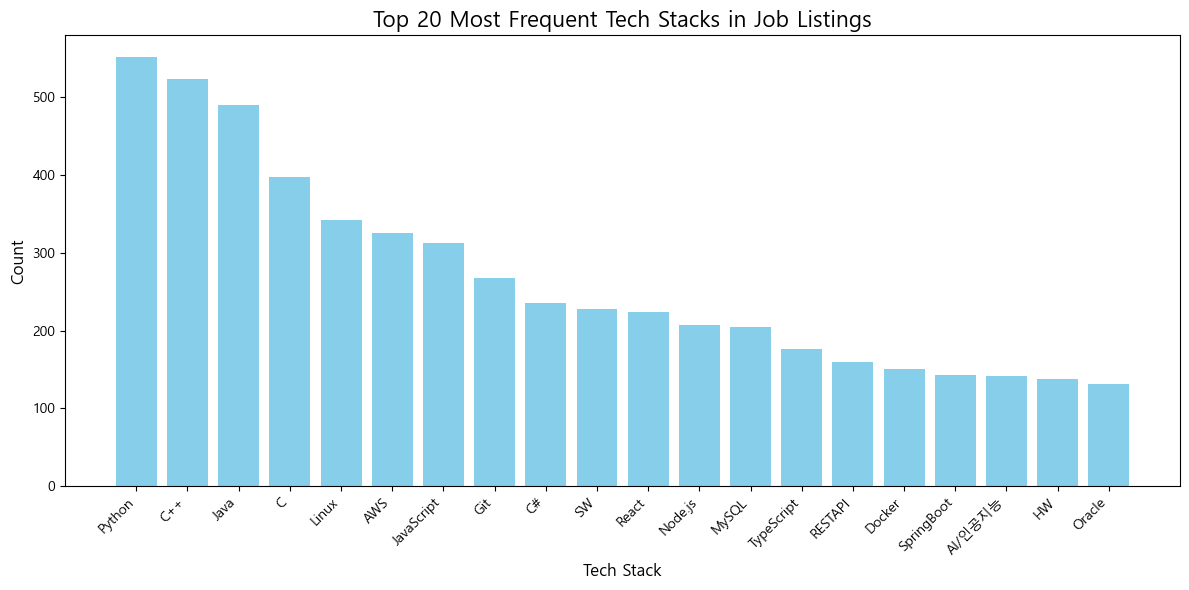

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 엑셀 파일 읽기
df = pd.read_excel('job_list_preprocessed.xlsx')

# 'Tech Stack' 컬럼에서 각 기술 스택 추출 및 빈도 계산
# ','로 구분된 기술 스택을 개별적으로 카운트
all_tech_stacks = []
df['Tech Stack'].dropna().apply(lambda x: all_tech_stacks.extend(x.split(',')))

# 기술 스택 빈도 계산
tech_stack_counts = Counter(all_tech_stacks)

# 빈도 상위 20개의 기술 스택 추출
top_20_tech_stacks = tech_stack_counts.most_common(20)

# 데이터프레임으로 변환 (시각화를 위해)
top_20_df = pd.DataFrame(top_20_tech_stacks, columns=['Tech Stack', 'Count'])

# 막대그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(top_20_df['Tech Stack'], top_20_df['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Tech Stacks in Job Listings', fontsize=16)
plt.xlabel('Tech Stack', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# 그래프 표시
plt.show()


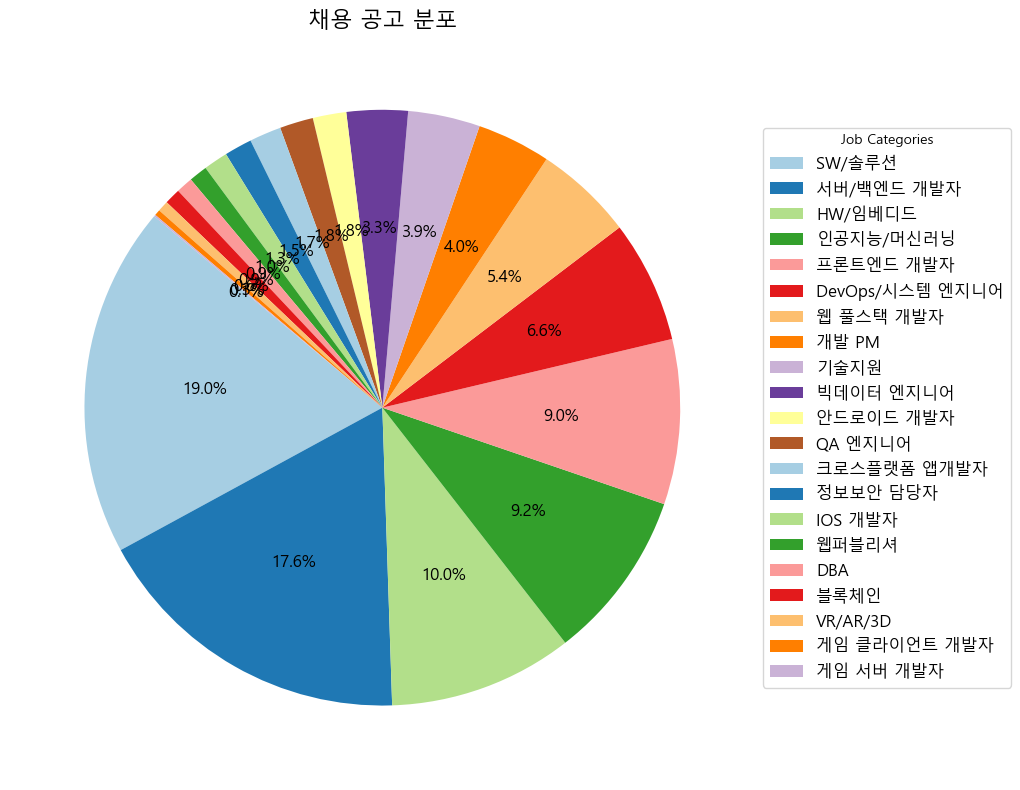

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 읽기
df = pd.read_excel('job_list_preprocessed.xlsx')

# Job Category 컬럼의 채용 공고 개수 카운트
job_category_counts = df['Job Category'].value_counts()

# 원그래프 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.Paired.colors  # 색상 조합
wedges, texts, autotexts = plt.pie(
    job_category_counts,
    autopct='%1.1f%%',  # 퍼센트 표시
    startangle=140,  # 시작 각도
    colors=colors,  # 색상 지정
    textprops={'fontsize': 12}  # 텍스트 크기
)

# 범례 추가
plt.legend(
    wedges,
    job_category_counts.index,  # Job Category 이름
    title="Job Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # 그래프 옆에 배치
    fontsize=12
)

plt.title('채용 공고 분포', fontsize=16)
plt.ylabel('')  # Y축 레이블 제거
plt.tight_layout()  # 레이아웃 조정
plt.show()


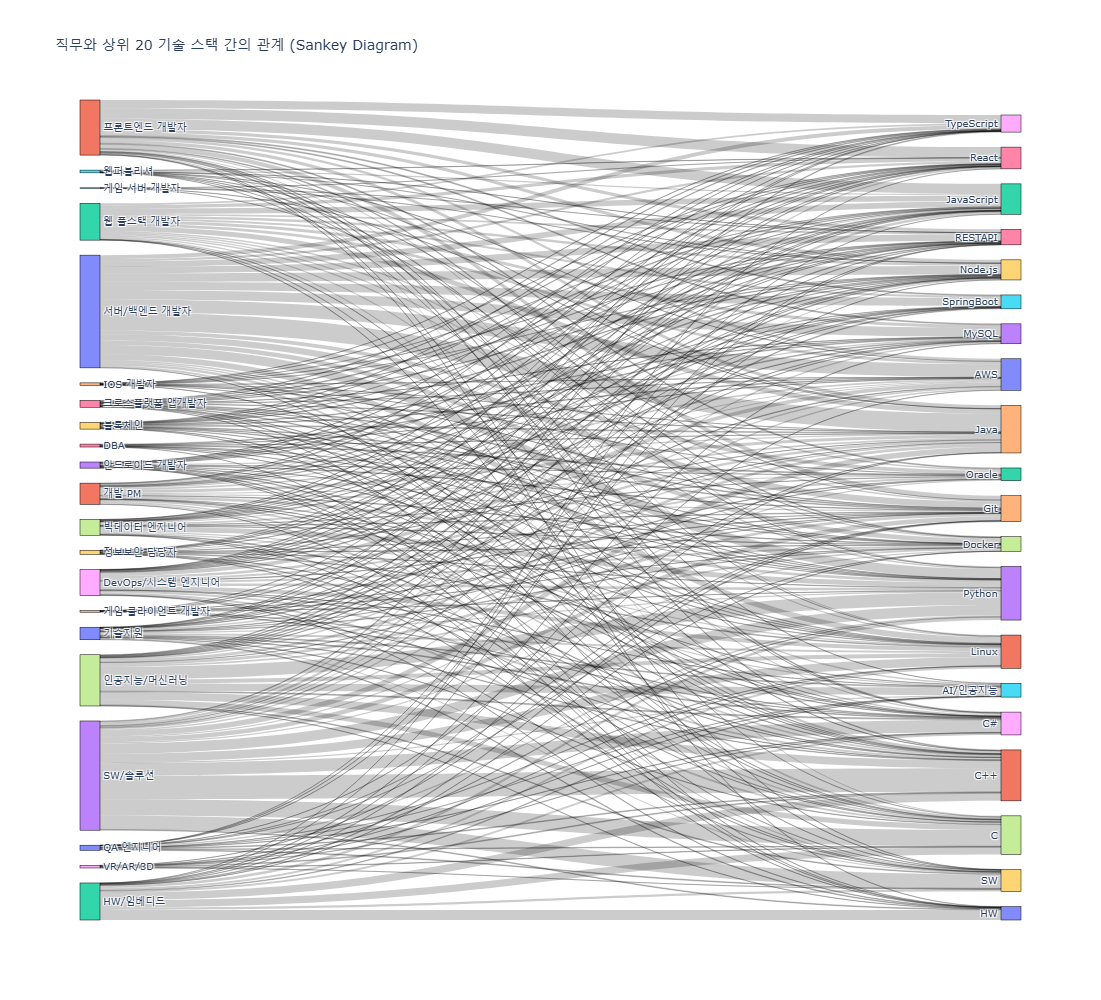

In [27]:
import pandas as pd
import plotly.graph_objects as go

# 엑셀 파일 읽기
df = pd.read_excel('job_list_preprocessed.xlsx')

# 데이터 준비
# Job Category와 Tech Stack 간의 연결 관계 추출
job_category = df['Job Category']
tech_stacks = df['Tech Stack']

# Tech Stack 컬럼을 ','로 분리하여 각 기술 스택을 개별 항목으로 나눔
df_exploded = df.assign(Tech_Stack_Split=tech_stacks.str.split(',')).explode('Tech_Stack_Split')
df_exploded['Tech_Stack_Split'] = df_exploded['Tech_Stack_Split'].str.strip()  # 공백 제거

# 기술 스택별 빈도 계산
top_20_tech_stacks = df_exploded['Tech_Stack_Split'].value_counts().head(20).index

# 상위 20개 기술 스택만 필터링
df_top_20 = df_exploded[df_exploded['Tech_Stack_Split'].isin(top_20_tech_stacks)]

# 직무와 기술 스택을 고유 값으로 인코딩
all_nodes = list(pd.concat([df_top_20['Job Category'], df_top_20['Tech_Stack_Split']]).unique())
node_indices = {name: i for i, name in enumerate(all_nodes)}

# 소스와 타겟 설정
source = df_top_20['Job Category'].map(node_indices)
target = df_top_20['Tech_Stack_Split'].map(node_indices)

# 연결 강도(링크 개수) 계산
link_data = df_top_20.groupby(['Job Category', 'Tech_Stack_Split']).size().reset_index(name='count')
link_source = link_data['Job Category'].map(node_indices)
link_target = link_data['Tech_Stack_Split'].map(node_indices)
link_values = link_data['count']

# Sankey Diagram 생성
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=link_source,  # 소스 노드
        target=link_target,  # 타겟 노드
        value=link_values    # 연결 강도
    )
)])

# 레이아웃 수정: 가로 길이 줄이고 세로 길이 늘리기
fig.update_layout(
    title_text="직무와 상위 20 기술 스택 간의 관계 (Sankey Diagram)",
    font_size=10,
    width=800,  # 가로 길이를 좁힘
    height=1000,  # 세로 길이를 늘림
)

fig.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Tech Stacks: [('c', 639), ('python', 556), ('java', 491), ('linux', 343), ('aws', 332), ('javascript', 318), ('git', 268), ('sw', 229), ('react', 225), ('mysql', 207)]


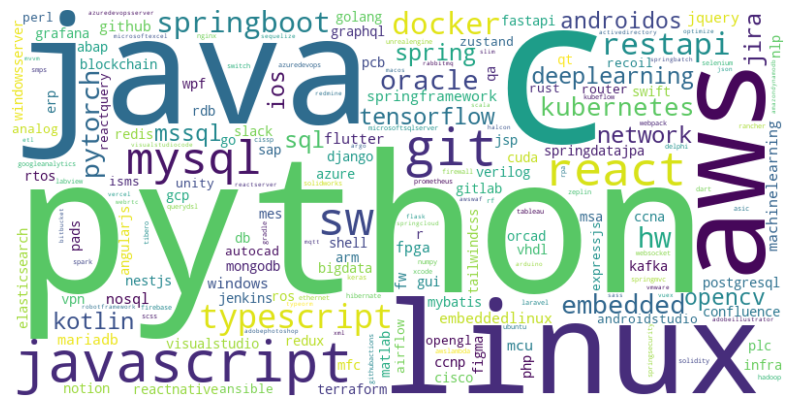

ValueError: Unknown format code 'd' for object of type 'float'

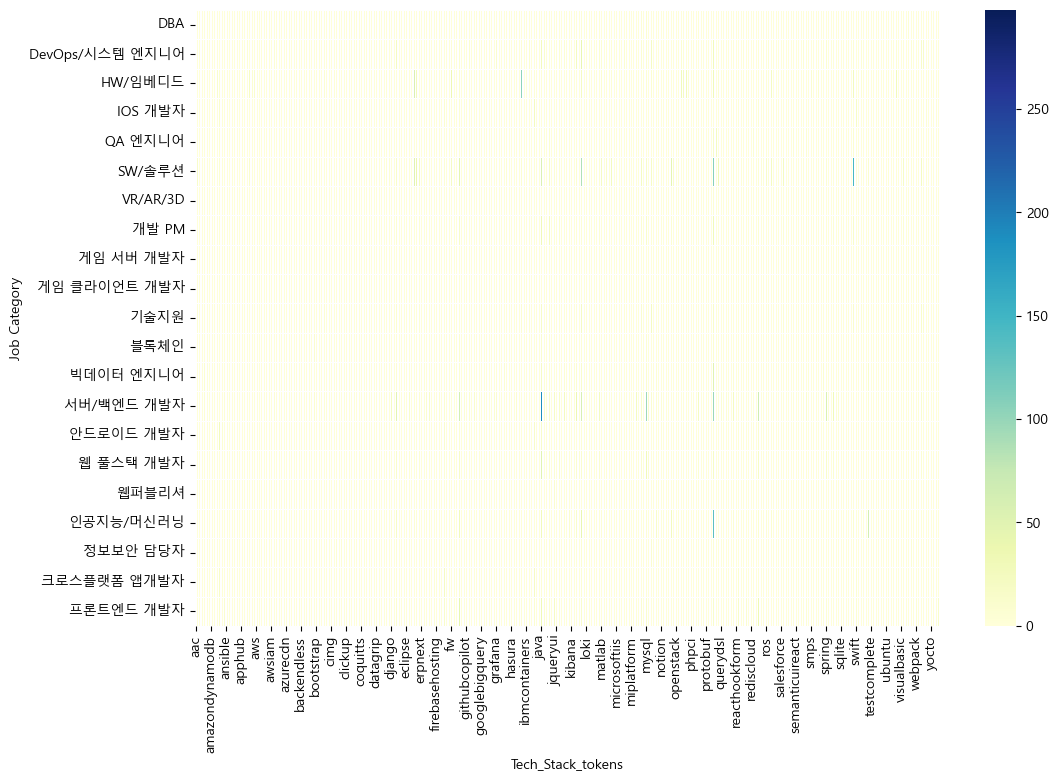

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLTK 리소스 다운로드 (필요한 경우)
nltk.download('punkt')
nltk.download('stopwords')

# 데이터 로드
file_path = 'job_list_preprocessed.xlsx'
df = pd.read_excel(file_path)

# 불용어(stopwords) 로딩
stop_words = set(stopwords.words('english'))

# 1. 텍스트 전처리 및 토큰화
def preprocess_text(text):
    # 소문자로 변환하고, 토큰화
    text = str(text).lower()
    tokens = word_tokenize(text)
    # 불용어 제거 및 숫자 제거
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# 'Title'과 'Tech Stack'에 대해 전처리
df['Title_tokens'] = df['Title'].apply(preprocess_text)
df['Tech_Stack_tokens'] = df['Tech Stack'].apply(preprocess_text)

# 2. 자주 등장하는 기술 스택 분석
tech_tokens = df['Tech_Stack_tokens'].explode().dropna()
tech_counts = Counter(tech_tokens)

# 상위 10개 기술 스택 출력
top_techs = tech_counts.most_common(10)
print("Top 10 Tech Stacks:", top_techs)

# 3. 워드클라우드 생성 (기술 스택 기반)
tech_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tech_counts)
plt.figure(figsize=(10, 6))
plt.imshow(tech_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 4. 직무별 기술 스택 분석 (Word Frequency)
job_tech_tokens = df[['Job Category', 'Tech_Stack_tokens']].dropna()
job_tech_tokens = job_tech_tokens.explode('Tech_Stack_tokens')

# 직무별로 기술 스택 빈도 분석
job_tech_counts = job_tech_tokens.groupby(['Job Category', 'Tech_Stack_tokens']).size().reset_index(name='count')

# 5. 직무와 기술 스택 간의 관계 시각화
# 직무와 기술 스택 빈도를 시각화하기 위해 Pivot Table 사용
job_tech_pivot = job_tech_counts.pivot_table(index='Job Category', columns='Tech_Stack_tokens', values='count', fill_value=0)

# 직무와 기술 스택 간의 관계 히트맵 생성
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(job_tech_pivot, cmap="YlGnBu", annot=True, fmt='d', linewidths=0.5)
plt.title("Job Category vs Tech Stack Frequency")
plt.ylabel("Job Category")
plt.xlabel("Tech Stack")
plt.show()

# 6. 경험 수준과 기술 스택 관계 분석
# 경험 수준별 기술 스택 빈도 분석
experience_tech_tokens = df.groupby('Experience')['Tech_Stack_tokens'].apply(lambda x: ','.join(x)).reset_index()
experience_tech_tokens['Tech_Stack_tokens'] = experience_tech_tokens['Tech_Stack_tokens'].str.split(',')
experience_tech_tokens = experience_tech_tokens.explode('Tech_Stack_tokens')

# 경험 수준별 기술 스택 빈도 분석
experience_tech_counts = experience_tech_tokens.groupby(['Experience', 'Tech_Stack_tokens']).size().unstack(fill_value=0)

# 경험 수준별 기술 스택 분포 시각화
experience_tech_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Tech Stacks by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Posts')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Tech Stack Combinations: [(frozenset({'mssql', 'c'}), 11), (frozenset({'cuda', 'c'}), 11), (frozenset({'linux', 'python', 'java', 'c'}), 10), (frozenset({'mssql', 'git', 'jira', 'python', 'sw', 'c'}), 10), (frozenset({'java', 'git', 'jira', 'confluence', 'blockchain'}), 8), (frozenset({'python', 'c'}), 8), (frozenset({'network', 'cisco'}), 8), (frozenset({'vhdl', 'fpga', 'asic', 'python', 'perl', 'verilog', 'c'}), 8), (frozenset({'visualstudio', 'c', 'opencv'}), 8), (frozenset({'python', 'jenkins', 'rancher', 'grafana'}), 6)]
Top 10 Job Category and Tech Stack Combinations: [(('프론트엔드 개발자', frozenset({'typescript', 'git', 'react', 'javascript'})), 6), (('인공지능/머신러닝', frozenset({'linux', 'python', 'java', 'c'})), 6), (('DevOps/시스템 엔지니어', frozenset({'cuda', 'c'})), 6), (('SW/솔루션', frozenset({'abap', 'sap'})), 6), (('인공지능/머신러닝', frozenset({'deeplearning', 'rtos', 'machinelearning', 'python', 'c'})), 5), (('개발 PM', frozenset({'mssql', 'git', 'jira', 'python', 'sw', 'c'})), 5), (('HW/임

C:\Users\user\AppData\Local\Temp\ipykernel_10972\3655340609.py:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




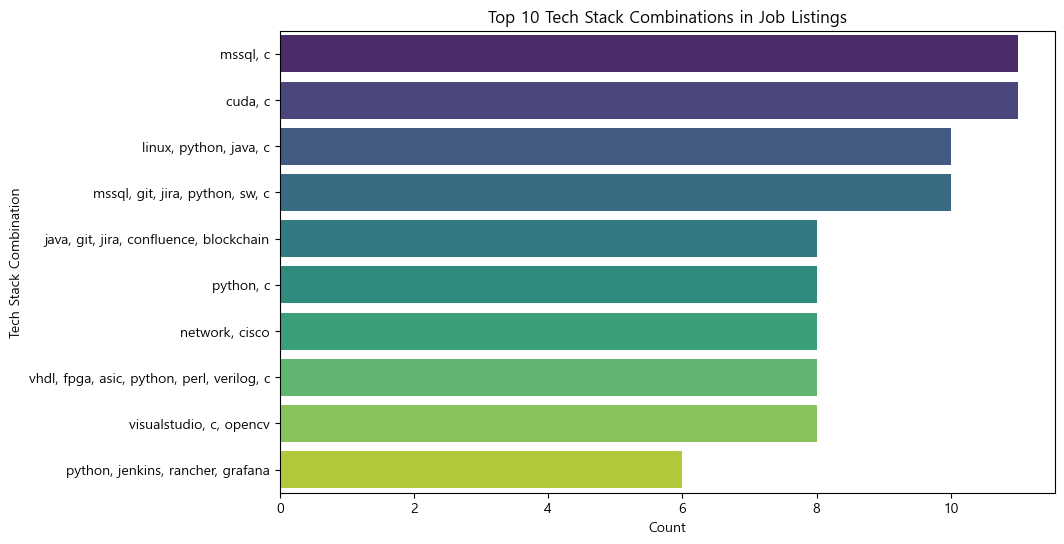

C:\Users\user\AppData\Local\Temp\ipykernel_10972\3655340609.py:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




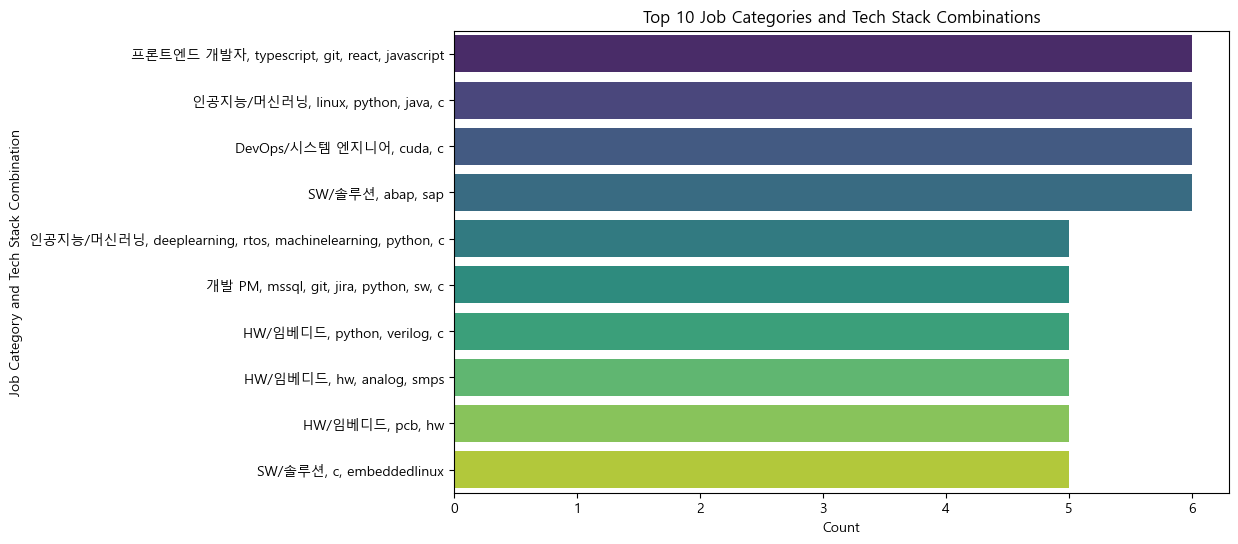

In [33]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK 리소스 다운로드 (필요한 경우)
nltk.download('punkt')

# 데이터 로드
file_path = 'job_list_preprocessed.xlsx'
df = pd.read_excel(file_path)

# 1. 텍스트 전처리 및 토큰화
def preprocess_text(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    # 숫자 제거 및 알파벳만 남기기
    tokens = [word for word in tokens if word.isalpha()]
    return tokens

# 'Tech Stack'에 대해 전처리
df['Tech_Stack_tokens'] = df['Tech Stack'].apply(preprocess_text)

# 2. 직무별 기술 스택 추출
job_tech_stack = df[['Job Category', 'Tech_Stack_tokens']]

# 3. 기술 스택 간의 조합 분석
# 각 직무에서 두 개 이상의 기술 스택이 함께 사용되는 경우 조합으로 분석
tech_stack_combinations = []

for tech_stack in job_tech_stack['Tech_Stack_tokens']:
    if len(tech_stack) > 1:
        tech_stack_combinations.extend([frozenset(tech_stack)])

# 기술 스택 조합 빈도 계산
tech_stack_combination_counts = Counter(tech_stack_combinations)

# 상위 10개 기술 스택 조합 출력
top_tech_stack_combinations = tech_stack_combination_counts.most_common(10)
print("Top 10 Tech Stack Combinations:", top_tech_stack_combinations)

# 4. 직무별 기술 스택 조합 분석
job_tech_combinations = []

for job_category, tech_stack in zip(df['Job Category'], df['Tech_Stack_tokens']):
    if len(tech_stack) > 1:
        job_tech_combinations.append((job_category, frozenset(tech_stack)))

# 직무별 기술 스택 조합 빈도 계산
job_tech_combination_counts = Counter(job_tech_combinations)

# 직무별 상위 10개 기술 스택 조합 출력
top_job_tech_combinations = job_tech_combination_counts.most_common(10)
print("Top 10 Job Category and Tech Stack Combinations:", top_job_tech_combinations)

# 5. 기술 스택 조합 시각화
tech_stack_combinations_df = pd.DataFrame(top_tech_stack_combinations, columns=['Tech Stack Combination', 'Count'])
tech_stack_combinations_df['Tech Stack Combination'] = tech_stack_combinations_df['Tech Stack Combination'].apply(lambda x: ', '.join(x))

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Tech Stack Combination', data=tech_stack_combinations_df, palette='viridis')
plt.title('Top 10 Tech Stack Combinations in Job Listings')
plt.xlabel('Count')
plt.ylabel('Tech Stack Combination')
plt.show()

# 6. 직무별 기술 스택 분석 (상위 10개 직무별 기술 스택 조합 시각화)
job_tech_combinations_df = pd.DataFrame(top_job_tech_combinations, columns=['Job Category and Tech Stack Combination', 'Count'])
job_tech_combinations_df['Job Category and Tech Stack Combination'] = job_tech_combinations_df['Job Category and Tech Stack Combination'].apply(lambda x: ', '.join([x[0], ', '.join(x[1])]))

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Job Category and Tech Stack Combination', data=job_tech_combinations_df, palette='viridis')
plt.title('Top 10 Job Categories and Tech Stack Combinations')
plt.xlabel('Count')
plt.ylabel('Job Category and Tech Stack Combination')
plt.show()
